# Figure 7

In [8]:
import numpy as np
import xarray as xr
from glob import glob
import gsw

import cosima_cookbook as cc

import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.path as mpath
import matplotlib as mpl
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cmocean.cm as cmo

In [9]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/44079/status,
Dashboard: /proxy/44079/status,Workers: 7
Total threads: 28,Total memory: 251.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44687,Workers: 7
Dashboard: /proxy/44079/status,Total threads: 28
Started: Just now,Total memory: 251.19 GiB
Comm: tcp://127.0.0.1:39357,Total threads: 4
Dashboard: /proxy/33733/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:36283,


In [10]:
import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

Read in data

In [11]:
path = '/g/data/e14/hd4873/access-om2-01/project03_misc_data/isobath_aligned_transects/'

# temp
control = xr.open_dataset(path+'temp_control.nc')
ssp245 = xr.open_dataset(path+'temp_ssp245.nc')
ssp245mw = xr.open_dataset(path+'temp_ssp245mw.nc')
ssp585 = xr.open_dataset(path+'temp_ssp585.nc')
ssp585mw = xr.open_dataset(path+'temp_ssp585mw.nc')
control_temp = control.__xarray_dataarray_variable__.rename('temp')
ssp245_temp = ssp245.__xarray_dataarray_variable__.rename('temp')
ssp245mw_temp = ssp245mw.__xarray_dataarray_variable__.rename('temp')
ssp585_temp = ssp585.__xarray_dataarray_variable__.rename('temp')
ssp585mw_temp = ssp585mw.__xarray_dataarray_variable__.rename('temp')

# salt
control = xr.open_dataset(path+'salt_control.nc')
ssp245 = xr.open_dataset(path+'salt_ssp245.nc')
ssp245mw = xr.open_dataset(path+'salt_ssp245mw.nc')
ssp585 = xr.open_dataset(path+'salt_ssp585.nc')
ssp585mw = xr.open_dataset(path+'salt_ssp585mw.nc')
control_salt = control.__xarray_dataarray_variable__.rename('salt')
ssp245_salt = ssp245.__xarray_dataarray_variable__.rename('salt')
ssp245mw_salt = ssp245mw.__xarray_dataarray_variable__.rename('salt')
ssp585_salt = ssp585.__xarray_dataarray_variable__.rename('salt')
ssp585mw_salt = ssp585mw.__xarray_dataarray_variable__.rename('salt')

# density
control_sig1 = xr.open_dataset(path+'sigma1_control.nc')
ssp245_sig1 = xr.open_dataset(path+'sigma1_ssp245.nc')
ssp245mw_sig1 = xr.open_dataset(path+'sigma1_ssp245mw.nc')
ssp585_sig1 = xr.open_dataset(path+'sigma1_ssp585.nc')
ssp585mw_sig1 = xr.open_dataset(path+'sigma1_ssp585mw.nc')
control_sig1 = control_sig1.__xarray_dataarray_variable__.rename('sig1')
ssp245_sig1 = ssp245_sig1.__xarray_dataarray_variable__.rename('sig1')
ssp245mw_sig1 = ssp245mw_sig1.__xarray_dataarray_variable__.rename('sig1')
ssp585_sig1 = ssp585_sig1.__xarray_dataarray_variable__.rename('sig1')
ssp585mw_sig1 = ssp585mw_sig1.__xarray_dataarray_variable__.rename('sig1')

control_sig0 = xr.open_dataset(path+'sigma0_control.nc')
ssp245_sig0 = xr.open_dataset(path+'sigma0_ssp245.nc')
ssp245mw_sig0 = xr.open_dataset(path+'sigma0_ssp245mw.nc')
ssp585_sig0 = xr.open_dataset(path+'sigma0_ssp585.nc')
ssp585mw_sig0 = xr.open_dataset(path+'sigma0_ssp585mw.nc')
control_sig0 = control_sig0.__xarray_dataarray_variable__.rename('sig0')
ssp245_sig0 = ssp245_sig0.__xarray_dataarray_variable__.rename('sig0')
ssp245mw_sig0 = ssp245mw_sig0.__xarray_dataarray_variable__.rename('sig0')
ssp585_sig0 = ssp585_sig0.__xarray_dataarray_variable__.rename('sig0')
ssp585mw_sig0 = ssp585mw_sig0.__xarray_dataarray_variable__.rename('sig0')


Combine into one dataset. 

In [12]:
da_temp = xr.concat([control_temp, ssp245_temp, ssp245mw_temp, ssp585_temp, ssp585mw_temp], dim = 'expt')
da_temp = da_temp.assign_coords({'expt': ['control', 'ssp245', 'ssp245mw', 'ssp585', 'ssp585mw']})

da_salt = xr.concat([control_salt, ssp245_salt, ssp245mw_salt, ssp585_salt, ssp585mw_salt], dim = 'expt')
da_salt = da_salt.assign_coords({'expt': ['control', 'ssp245', 'ssp245mw', 'ssp585', 'ssp585mw']})

da_sig0 = xr.concat([control_sig0, ssp245_sig0, ssp245mw_sig0, ssp585_sig0, ssp585mw_sig0], dim = 'expt')
da_sig0 = da_sig0.assign_coords({'expt': ['control', 'ssp245', 'ssp245mw', 'ssp585', 'ssp585mw']})

da_sig1 = xr.concat([control_sig1, ssp245_sig1, ssp245mw_sig1, ssp585_sig1, ssp585mw_sig1], dim = 'expt')
da_sig1 = da_sig1.assign_coords({'expt': ['control', 'ssp245', 'ssp245mw', 'ssp585', 'ssp585mw']})

ds = xr.merge([da_temp, da_salt, da_sig0, da_sig1])
ds

<xarray.Dataset> Size: 19GB
Dimensions:         (st_ocean: 75, yt_isobath_rel: 510, xt_ocean: 3600, expt: 5)
Coordinates:
  * st_ocean        (st_ocean) float64 600B 0.5413 1.681 ... 5.511e+03 5.709e+03
  * yt_isobath_rel  (yt_isobath_rel) float64 4kB -8.575 -8.532 ... 13.45 13.5
  * xt_ocean        (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.85 79.95
  * expt            (expt) <U8 160B 'control' 'ssp245' ... 'ssp585' 'ssp585mw'
Data variables:
    temp            (expt, st_ocean, yt_isobath_rel, xt_ocean) float32 3GB na...
    salt            (expt, st_ocean, yt_isobath_rel, xt_ocean) float64 6GB na...
    sig0            (expt, st_ocean, yt_isobath_rel, xt_ocean) float64 6GB na...
    sig1            (expt, st_ocean, yt_isobath_rel, xt_ocean) float64 6GB na...

Define colour maps. 

In [14]:
from palettable.cmocean.diverging import Balance_11
from palettable.cmocean.diverging import Delta_11

cmap_T = plt.cm.get_cmap(Balance_11.mpl_colormap)
levels_T = np.arange(-2.0, 2.05, 0.1)
cmap_T.set_bad('k')

cmap_S = plt.cm.get_cmap(Delta_11.mpl_colormap)
levels_S = np.arange(-0.8, 0.82, 0.04)
cmap_S.set_bad('k')

Define plotting functions

In [15]:
def colorbar_vert(cb, axes, label):
    fs = 16
    cbaxes = fig.add_axes(axes)
    cbar = plt.colorbar(cb, cax = cbaxes, orientation = 'vertical',extend = 'both')
    cbar.set_label(label,fontsize=fs,labelpad=6)
    #cbar.ax.tick_params(labelsize=fs, labeltop=True)
    return cbar

def colorbar_horz(cb, axes, label):
    fs = 16
    cbaxes = fig.add_axes(axes)
    cbar = plt.colorbar(cb, cax = cbaxes, orientation = 'horizontal',extend = 'both')
    cbar.set_label(label,fontsize=fs,labelpad=6)
    cbar.ax.tick_params(labelsize=fs, labeltop=False)
    return cbar

def fig_setup(sim_labels):

    plt.rcParams.update({'font.size': 15})
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14.5,20), height_ratios=[1,1,0.5,1,1] )
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    fig.delaxes(axes[2,0])
    fig.delaxes(axes[2,1])
    
    for i, ax in enumerate(axes.flatten()):
        ax.set_facecolor('dimgrey')
        ax.text(0.02, 0.04, f'{labels[i]}',  c='k', fontsize=24, ha='left', fontweight='bold', transform=ax.transAxes)
        ax.text(0.97, 0.06, f'{np.tile(sim_labels,2)[i]}', fontsize=18, fontweight='bold', color='dimgrey', ha='right', transform=ax.transAxes,
                bbox=dict(facecolor='w', alpha=0.8, edgecolor='dimgrey', boxstyle='round,pad=0.2'), zorder=3)
    
    for i, ax in enumerate(axes[:,0]):
        ax.set_ylabel('Depth (m)')
    for i, ax in enumerate(axes[:,1]):
        ax.set_yticklabels([])
    for i, ax in enumerate(axes[0,:]):
        ax.set_xticklabels([])
    for i, ax in enumerate(axes[3,:]):
        ax.set_xticklabels([])

    axes[0,0].text(0.0, 1.04, 'East Antarctica (110-130\u00b0E)',  c='k', fontsize=16, fontweight='bold',transform=axes[0,0].transAxes)
    axes[3,0].text(0.0, 1.04, 'Bellingshausen Sea (85-100\u00b0W)',  c='k', fontsize=16, fontweight='bold',transform=axes[3,0].transAxes)
    #axes[1,0].text(0.9, -0.2, 'Latitude (\u00b0)', c='k',fontsize=16, transform=axes[1,0].transAxes)
    axes[-1,0].text(0.63, -0.2, 'Latitude (\u00b0 relative to 1000 m isobath)', c='k',fontsize=16, transform=axes[-1,0].transAxes)

    for i, ax in enumerate(axes[:2,:].flatten()):
        ax.set_ylim([4000, 0])
        ax.set_xlim([-2.1, 4])
    for i, ax in enumerate(axes[2:,:].flatten()):
        ax.set_ylim([1200, 0])
        ax.set_xlim([-3.6, 2]) # [-2.2, 2]

    return fig, axes

def slice_longitude_and_take_mean(bound1, bound2, bound3, expt):

    ds_tmp = ds.sel(expt = expt)
    ds_mean = ds_tmp.where(((ds_tmp.xt_ocean < bound1) & (ds_tmp.xt_ocean >= bound2) | (ds_tmp.xt_ocean  > bound3)), np.nan).mean('xt_ocean')

    return ds_mean

def plot_contours_control(axes, control, north_index, levels, bold_level):
    contour_colour = 'grey'
    linewidth = 1.4
    linestyle = '--'
    
    for i, ax in enumerate(axes.flatten()):
        cs = ax.contour(control.yt_isobath_rel[:north_index], control.st_ocean, control['sig0'][:,:north_index], 
                        levels=levels, colors=contour_colour, linewidths=linewidth, 
                        linestyles=linestyle, zorder=2)
        ax.clabel(cs, levels, use_clabeltext=True, fontsize=10, zorder=2)
        cs = ax.contour(control.yt_isobath_rel[:north_index], control.st_ocean, control['sig0'][:,:north_index], 
                        levels=[bold_level], colors=contour_colour, linewidths=2.5, 
                        linestyles=linestyle, zorder=2)
        ax.clabel(cs, [bold_level], use_clabeltext=True, fontsize=10, zorder=2)

    return


def plot_contours_experiment(axes, experiment, north_index, levels, bold_level):
    contour_colour = 'k'
    linewidth = 0.8
    linestyle = '-'
    
    for i, ax in enumerate(axes.flatten()):
        cs = ax.contour(experiment.yt_isobath_rel[:north_index], experiment.st_ocean, experiment['sig0'][:, :north_index], 
                        levels=levels, colors=contour_colour, linewidths=linewidth, 
                        linestyles=linestyle, zorder=2)
        ax.clabel(cs, levels, use_clabeltext=True, fontsize=10, zorder=2)

        cs = ax.contour(experiment.yt_isobath_rel[:north_index], experiment.st_ocean, experiment['sig0'][:, :north_index], 
                        levels=[bold_level], colors=contour_colour, linewidths=2, 
                        linestyles=linestyle, zorder=3)
        ax.clabel(cs, [bold_level], use_clabeltext=True, fontsize=10, zorder=3)

    return 
    

### Plot figure: SSP245-MW plus SSP585-MW

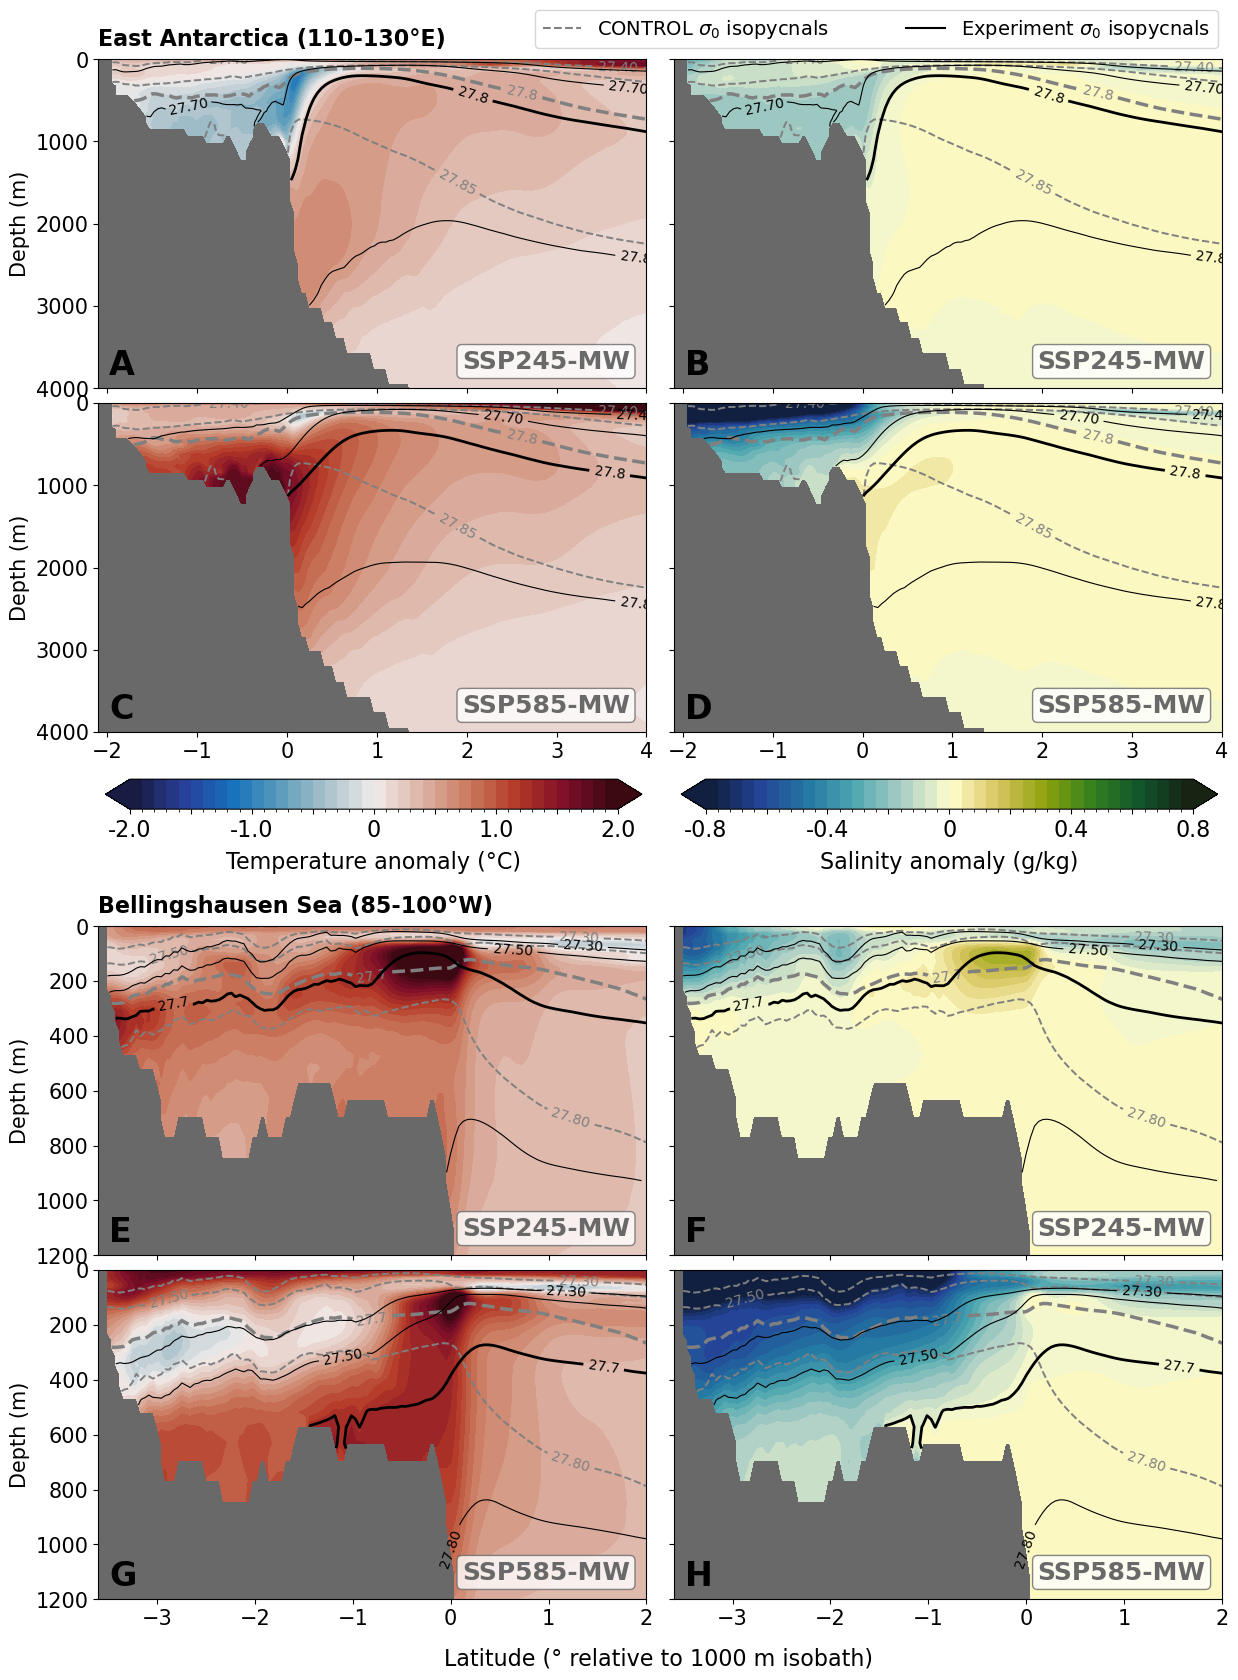

In [16]:
labels = ['A','B','C','D','','','E','F','G','H','I','J','K']
sim_labels = ['SSP245-MW','SSP245-MW','SSP585-MW','SSP585-MW','','']


# set up figure instance and axes
fig, axes = fig_setup(sim_labels)


### East Antarctica ###
lon1, lon2, lon3 = -230, -250, 80
control_tmp = slice_longitude_and_take_mean(lon1, lon2, lon3, 'control')
expt_tmp = slice_longitude_and_take_mean(lon1, lon2, lon3, 'ssp245mw')
exptmw_tmp = slice_longitude_and_take_mean(lon1, lon2, lon3, 'ssp585mw')

# Plot temperature anomaly
axes[0,0].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, expt_tmp['temp'] - control_tmp['temp'],
                   cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T, ncolors=cmap_T.N, clip=False), 
                   levels=levels_T, extend='both')
cbT = axes[1,0].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, exptmw_tmp['temp'] - control_tmp['temp'],
                         cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T, ncolors=cmap_T.N, clip=False), 
                         levels=levels_T, extend='both')

# Plot salinity anomaly
axes[0,1].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, expt_tmp['salt'] - control_tmp['salt'],
                   cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S, ncolors=cmap_S.N, clip=False), 
                   levels=levels_S, extend='both')
cbS = axes[1,1].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, exptmw_tmp['salt'] - control_tmp['salt'],
                         cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S, ncolors=cmap_S.N, clip=False), 
                         levels=levels_S, extend='both')

# Add density contours
contour_levels = [27.4, 27.7, 27.85]
plot_contours_control(axes[:2, :], control_tmp, -150, contour_levels, [27.8])
plot_contours_experiment(axes[0, :], expt_tmp, -150, contour_levels, [27.8])
plot_contours_experiment(axes[1, :], exptmw_tmp, -150, contour_levels, [27.8])



### Bellingshausen Sea ###
lon1, lon2, lon3 = -85, -100, 80
control_tmp = slice_longitude_and_take_mean(lon1, lon2, lon3, 'control')
expt_tmp = slice_longitude_and_take_mean(lon1, lon2, lon3, 'ssp245mw')
exptmw_tmp = slice_longitude_and_take_mean(lon1, lon2, lon3, 'ssp585mw')

# Plot temperature anomaly
axes[3,0].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, expt_tmp['temp'] - control_tmp['temp'],
                   cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T, ncolors=cmap_T.N, clip=False), 
                   levels=levels_T, extend='both')
cbT = axes[4,0].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, exptmw_tmp['temp'] - control_tmp['temp'],
                         cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T, ncolors=cmap_T.N, clip=False), 
                         levels=levels_T, extend='both')

# Plot salinity anomaly
axes[3,1].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, expt_tmp['salt'] - control_tmp['salt'],
                   cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S, ncolors=cmap_S.N, clip=False), 
                   levels=levels_S, extend='both')
cbS = axes[4,1].contourf(control_tmp.yt_isobath_rel, control_tmp.st_ocean, exptmw_tmp['salt'] - control_tmp['salt'],
                         cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S, ncolors=cmap_S.N, clip=False), 
                         levels=levels_S, extend='both')

# Add density contours
contour_levels = [27.3, 27.5, 27.8, 27.85]
plot_contours_control(axes[2:, :], control_tmp, -250, contour_levels, [27.7])
plot_contours_experiment(axes[3, :], expt_tmp, -250, contour_levels, [27.7])
plot_contours_experiment(axes[4, :], exptmw_tmp, -255, contour_levels, [27.7])


# add colourbars
cbar = colorbar_horz(cbT, [0.13, 0.505, 0.37, 0.015],'Temperature anomaly (\u00b0C)')
cbar.ax.set_xticks([-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0])
cbar.ax.set_xticklabels([-2.0,'',-1.0,'',0,'',1.0,'',2.0])
cbar = colorbar_horz(cbS, [0.527, 0.505, 0.37, 0.015],'Salinity anomaly (g/kg)')
cbar.ax.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
cbar.ax.set_xticklabels([-0.8, '', -0.4, '', 0, '', 0.4, '', 0.8])


# add legend
line1 = Line2D([0], [0], color='grey', linestyle='--')
line2 = Line2D([0], [0], color='k', linestyle='-')
legend_labels = [f'CONTROL $\sigma_0$ isopycnals', f'Experiment $\sigma_0$ isopycnals']
axes[0, 0].legend([line1, line2], legend_labels, bbox_to_anchor=[2.06, 1.18], 
                  loc='upper right', fontsize=14, ncols=4, columnspacing=4, )

# save figure
# fig.savefig('../figs/Fig07_T-S_transects_SSP245-585_MW.jpg', dpi=300, bbox_inches='tight')

plt.show()

For comparison, we'll also plot the 585 vs 585-MW transects. 

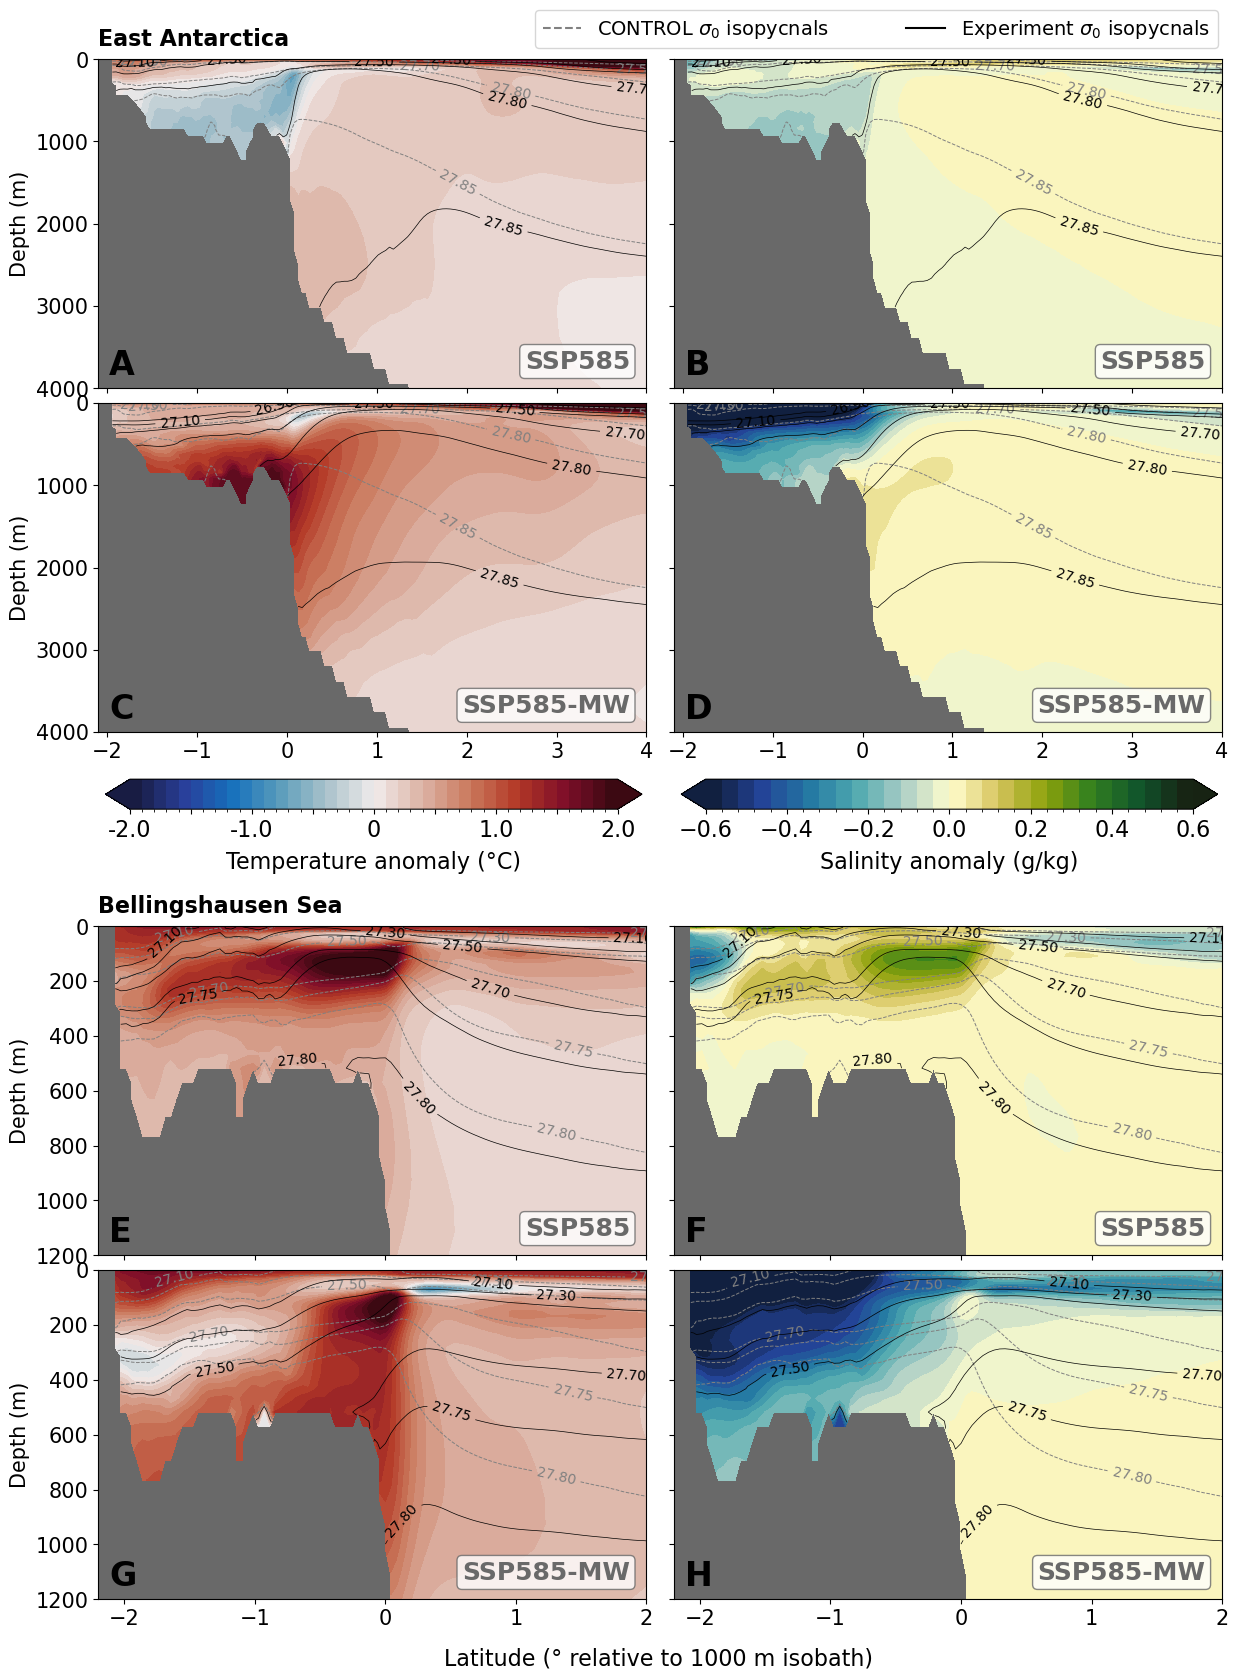

CPU times: user 21.6 s, sys: 19.1 s, total: 40.7 s
Wall time: 54.5 s


In [7]:
%%time
labels = ['A','B','C','D','','','E','F','G','H','I','J','K']
sim_labels = ['SSP585','SSP585','SSP585-MW','SSP585-MW','','']
    

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14.5,20), height_ratios=[1,1,0.5,1,1] )
plt.subplots_adjust(wspace=0.05, hspace=0.05)

fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])

for i, ax in enumerate(axes.flatten()):
    ax.set_facecolor('dimgrey')
    ax.text(0.02, 0.04, f'{labels[i]}',  c='k', fontsize=24, ha='left', fontweight='bold', transform=ax.transAxes)
    ax.text(0.97, 0.06, f'{np.tile(sim_labels,2)[i]}', fontsize=18, fontweight='bold', color='dimgrey', ha='right', transform=ax.transAxes,
            bbox=dict(facecolor='w', alpha=0.8, edgecolor='dimgrey', boxstyle='round,pad=0.2'), zorder=3)

for i, ax in enumerate(axes[:,0]):
    ax.set_ylabel('Depth (m)')
for i, ax in enumerate(axes[:,1]):
    ax.set_yticklabels([])
for i, ax in enumerate(axes[0,:]):
    ax.set_xticklabels([])
for i, ax in enumerate(axes[3,:]):
    ax.set_xticklabels([])

axes[0,0].text(0.0, 1.04, 'East Antarctica',  c='k', fontsize=16, fontweight='bold',transform=axes[0,0].transAxes)
axes[3,0].text(0.0, 1.04, 'Bellingshausen Sea',  c='k', fontsize=16, fontweight='bold',transform=axes[3,0].transAxes)

#axes[1,0].text(0.9, -0.2, 'Latitude (\u00b0)', c='k',fontsize=16, transform=axes[1,0].transAxes)
axes[-1,0].text(0.63, -0.2, 'Latitude (\u00b0 relative to 1000 m isobath)', c='k',fontsize=16, transform=axes[-1,0].transAxes)



# EAST ANTARCTICA
l1,l2,l3 = -230,-250,80
# temp
control_mean_T = control_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_T = ssp585_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_T = ssp585mw_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# salt
control_mean_S = control_salt.where(((control_salt.xt_ocean < l1) & (control_salt.xt_ocean >= l2) | (control_salt.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_S = ssp585_salt.where(((control_salt.xt_ocean < l1) & (control_salt.xt_ocean >= l2) | (control_salt.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_S = ssp585mw_salt.where(((control_salt.xt_ocean < l1) & (control_salt.xt_ocean >= l2) | (control_salt.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# sigma1
control_mean_sig1 = control_sig1.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_sig1 = ssp585_sig1.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_sig1 = ssp585mw_sig1.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# sigma0
control_mean_sig0 = control_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_sig0 = ssp585_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_sig0 = ssp585mw_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# plot temperature
axes[0,0].contourf(ssp585_mean_T.yt_isobath_rel, ssp585_mean_T.st_ocean, ssp585_mean_T - control_mean_T,
                   cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T,ncolors=cmap_T.N, clip=False), 
                   levels=levels_T, extend='both')
cbT = axes[1,0].contourf(ssp585mw_mean_T.yt_isobath_rel, ssp585mw_mean_T.st_ocean, ssp585mw_mean_T - control_mean_T,
                   cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T,ncolors=cmap_T.N, clip=False), 
                   levels=levels_T, extend='both')
cbar = colorbar_horz(cbT, [0.13, 0.505, 0.37, 0.015],'Temperature anomaly (\u00b0C)')
cbar.ax.set_xticks([-2.0, -1.5, -1.0, -0.5, 0,0.5,1.0,1.5,2.0])
cbar.ax.set_xticklabels([-2.0,'',-1.0,'',0,'',1.0,'',2.0])
# plot salinity
axes[0,1].contourf(ssp585_mean_S.yt_isobath_rel, ssp585_mean_S.st_ocean, ssp585_mean_S - control_mean_S,
                   cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S,ncolors=cmap_S.N, clip=False), 
                   levels=levels_S, extend='both')
cbS = axes[1,1].contourf(ssp585mw_mean_S.yt_isobath_rel, ssp585mw_mean_S.st_ocean, ssp585mw_mean_S - control_mean_S,
                   cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S,ncolors=cmap_S.N, clip=False), 
                   levels=levels_S, extend='both')
cbar = colorbar_horz(cbS, [0.527, 0.505, 0.37, 0.015],'Salinity anomaly (g/kg)')
cbar.ax.set_xticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
#cbar.ax.set_xticklabels(['-0.5','','-0.3','','-0.1','0','0.1','','0.3','','0.5'])
# density levels
lvls = np.concatenate((np.arange(32.1, 32.5, 0.1), np.arange(32.5,34,0.02)))
lvls = np.concatenate((np.arange(27.1,27.6,0.1), np.arange(27.6,30.1,0.05)))
lvls = [26.9, 27.1, 27.3, 27.5, 27.7, 27.8, 27.85]
for i, ax in enumerate(axes[:2,:].flatten()):
    ax.set_ylim([4000,0])
    ax.set_xlim([-2.1,4])
    # plot contours
    #cs = ax.contour(control_mean_sig1.yt_isobath_rel, control_mean_sig1.st_ocean, 
    #                control_mean_sig1, levels=lvls, colors='grey', linewidths=0.6, linestyles='--', zorder=2)
    cs = ax.contour(control_mean_sig0.yt_isobath_rel[:-150], control_mean_sig0.st_ocean, 
                    control_mean_sig0[:,:-150], levels=lvls, colors='grey', linewidths=0.7, linestyles='--', zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, fontsize=10, zorder=2)
for i, ax in enumerate(axes[0,:]):
    cs = ax.contour(ssp585_mean_sig1.yt_isobath_rel, ssp585_mean_sig1.st_ocean, 
                    ssp585_mean_sig1, levels=lvls, colors='k', linewidths=0.5, zorder=2)
    cs = ax.contour(ssp585_mean_sig0.yt_isobath_rel[:-170], ssp585_mean_sig0.st_ocean, 
                    ssp585_mean_sig0[:,:-170], levels=lvls, colors='k', linewidths=0.5, zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, fontsize=10, zorder=2)
for i, ax in enumerate(axes[1,:]):
    cs = ax.contour(ssp585mw_mean_sig1.yt_isobath_rel, ssp585mw_mean_sig1.st_ocean, 
                    ssp585mw_mean_sig1, levels=lvls, colors='k', linewidths=0.5, zorder=2)
    cs = ax.contour(ssp585mw_mean_sig0.yt_isobath_rel[:-200], ssp585mw_mean_sig0.st_ocean, 
                    ssp585mw_mean_sig0[:,:-200], levels=lvls, colors='k', linewidths=0.5, zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, fontsize=10, zorder=2)
#axes[1,0].set_xticklabels(['-2\u00b0','-1\u00b0','0\u00b0','1\u00b0','2\u00b0','3\u00b0','3\u00b0'])


# BELLINGSHAUSEN SEA
l1,l2,l3 = -90,-100,80
# temp
control_mean_T = control_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_T = ssp585_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_T = ssp585mw_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# salt
control_mean_S = control_salt.where(((control_salt.xt_ocean < l1) & (control_salt.xt_ocean >= l2) | (control_salt.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_S = ssp585_salt.where(((control_salt.xt_ocean < l1) & (control_salt.xt_ocean >= l2) | (control_salt.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_S = ssp585mw_salt.where(((control_salt.xt_ocean < l1) & (control_salt.xt_ocean >= l2) | (control_salt.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# sigma1
control_mean_sig1 = control_sig1.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_sig1 = ssp585_sig1.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_sig1 = ssp585mw_sig1.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# sigma0
control_mean_sig0 = control_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585_mean_sig0 = ssp585_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_sig0 = ssp585mw_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
# plot temperature
axes[3,0].contourf(ssp585_mean_T.yt_isobath_rel, ssp585_mean_T.st_ocean, ssp585_mean_T - control_mean_T,
                   cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T,ncolors=cmap_T.N, clip=False), 
                   levels=levels_T, extend='both')
axes[4,0].contourf(ssp585mw_mean_T.yt_isobath_rel, ssp585mw_mean_T.st_ocean, ssp585mw_mean_T - control_mean_T,
                   cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T,ncolors=cmap_T.N, clip=False), 
                   levels=levels_T, extend='both')

# plot salinity
axes[3,1].contourf(ssp585_mean_S.yt_isobath_rel, ssp585_mean_S.st_ocean, ssp585_mean_S - control_mean_S,
                   cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S,ncolors=cmap_S.N, clip=False), 
                   levels=levels_S, extend='both')
axes[4,1].contourf(ssp585mw_mean_S.yt_isobath_rel, ssp585mw_mean_S.st_ocean, ssp585mw_mean_S - control_mean_S,
                   cmap=cmap_S, norm=mpl.colors.BoundaryNorm(levels_S,ncolors=cmap_S.N, clip=False), 
                   levels=levels_S, extend='both')

lvls = np.concatenate((np.arange(27.1,27.6,0.1), np.arange(27.6,30.1,0.05)))
lvls = [27.1, 27.3, 27.5, 27.7, 27.75, 27.8, 27.85]
for i, ax in enumerate(axes[2:,:].flatten()):
    ax.set_ylim([1200,0])
    ax.set_xlim([-2.2,2])
    cs = ax.contour(control_mean_sig0.yt_isobath_rel[:-258], control_mean_sig0.st_ocean, 
                    control_mean_sig0[:,:-258], levels=lvls, colors='grey', linewidths=0.7, linestyles='--', zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, fontsize=10, zorder=2)
for i, ax in enumerate(axes[3,:]):
    cs = ax.contour(ssp585_mean_sig0.yt_isobath_rel[:-250], ssp585_mean_sig0.st_ocean, 
                    ssp585_mean_sig0[:,:-250], levels=lvls, colors='k', linewidths=0.5, zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, fontsize=10, zorder=2)
for i, ax in enumerate(axes[4,:]):
    cs = ax.contour(ssp585mw_mean_sig0.yt_isobath_rel[:-255], ssp585mw_mean_sig0.st_ocean, 
                    ssp585mw_mean_sig0[:,:-255], levels=lvls, colors='k', linewidths=0.5, zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, fontsize=10, zorder=2)

# add legend
line1 = Line2D([0], [0], color='grey', linestyle='--')
line2 = Line2D([0], [0], color='k', linestyle='-')
legend_labels = [f'CONTROL $\sigma_0$ isopycnals', f'Experiment $\sigma_0$ isopycnals']
axes[0,0].legend([line1, line2],legend_labels, bbox_to_anchor=[2.06, 1.18], loc='upper right', fontsize=14, ncols=4, columnspacing=4)

# save figure
# fig.savefig('../figs/Fig07_T-S_transects.jpg', dpi=300, bbox_inches='tight')


plt.show()